In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [85]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [3]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
data.shape

(30, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
data.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [7]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64


689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: R, dtype: int64


5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: AB, dtype: int64


1363    2
1497    1
1386    1
1324    1
1494    1
1486    1
1346    1
1374    1
1361    1
1420    1
1351    1
1382    1
1378    1
1341    1
1462    1
1405    1
1349    1

In [8]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


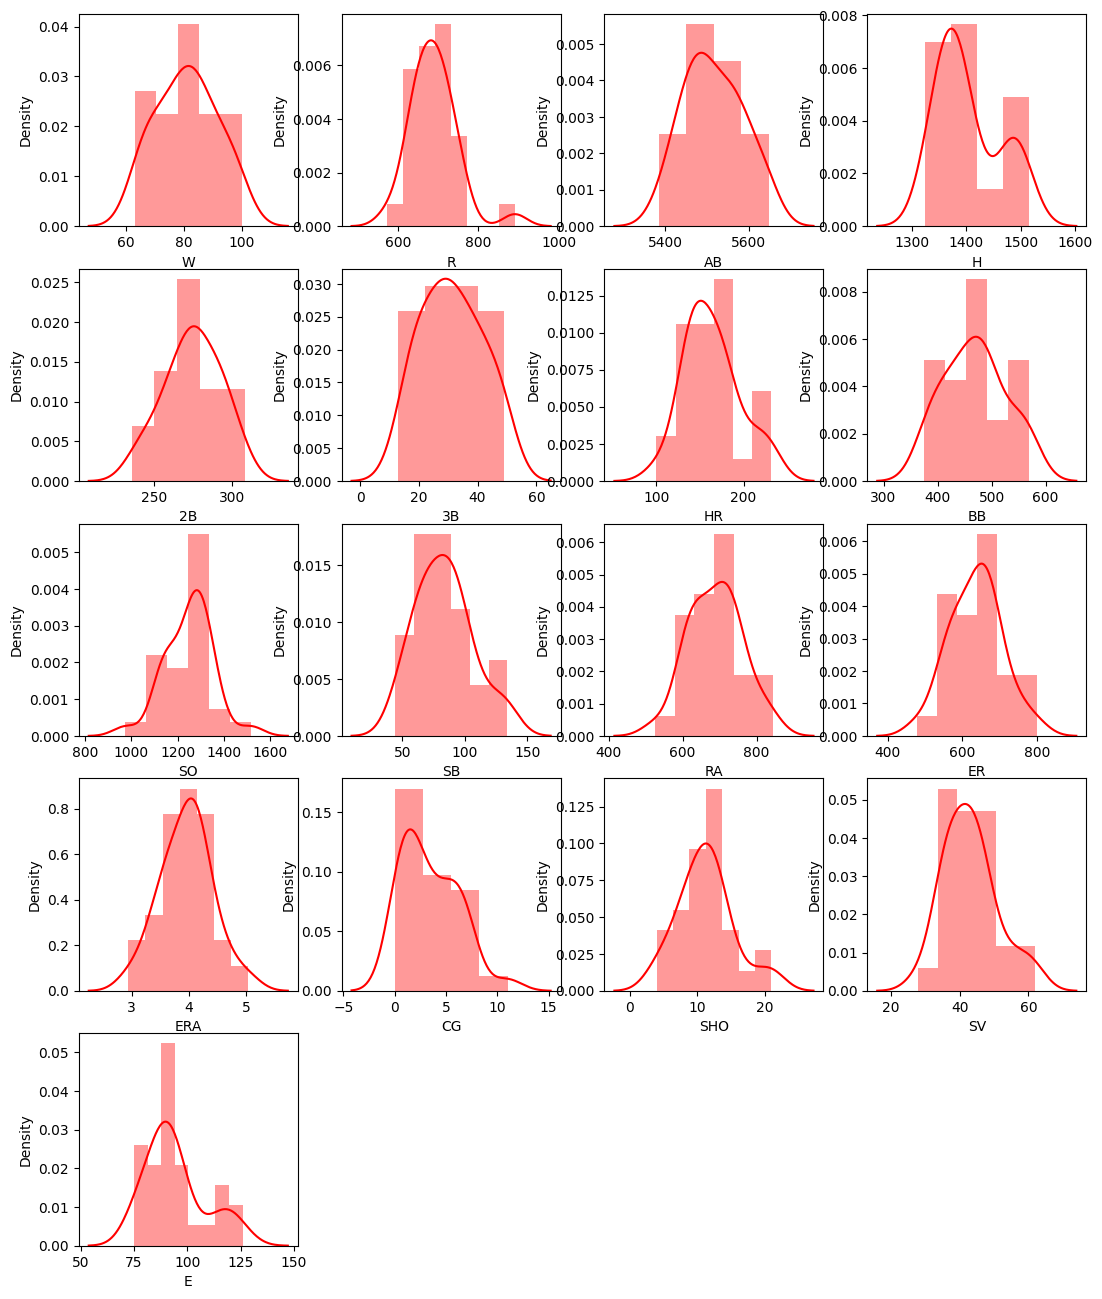

In [9]:
plt.figure(figsize = (13,16))
plotnumber = 1
for col in data.columns:
    if plotnumber<=17:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(data[col], color='r')
        plt.xlabel(col)
        plotnumber +=1

In [10]:
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

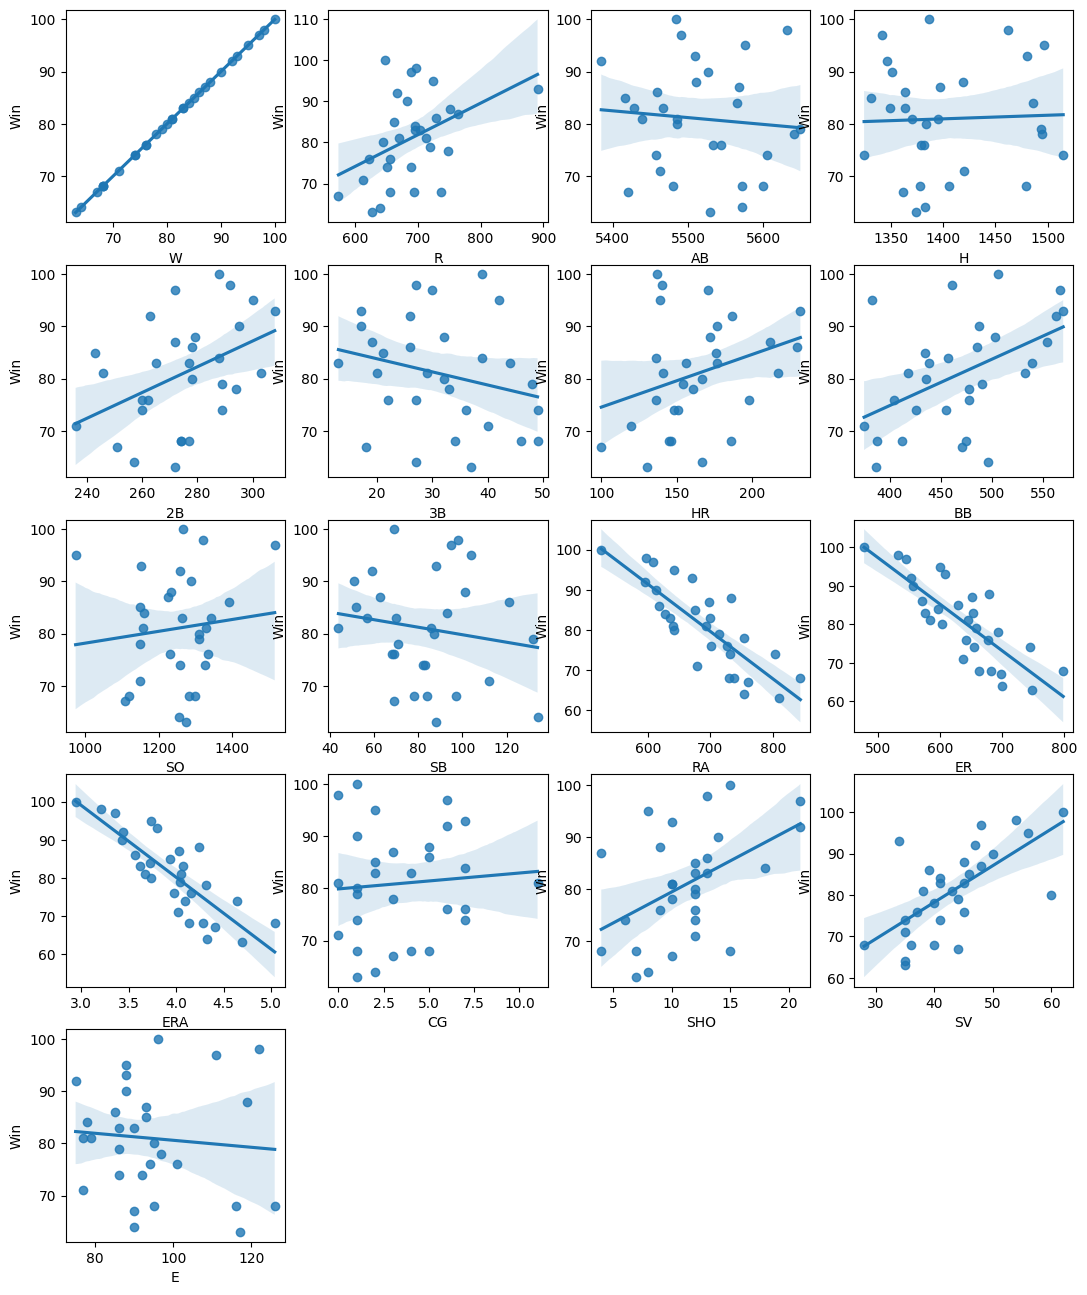

In [11]:
plt.figure(figsize = (13,16))
plotnumber = 1
for col in data.columns:
    if plotnumber<=17:
        ax = plt.subplot(5,4,plotnumber)
        sns.regplot(x = col , y = 'W' , data=data)
        plt.xlabel(col)
        plt.ylabel('Win')
        plotnumber +=1



*   All columns have a normal distribution
*   Features with strong positive relationship with target: SV, SHO, R,
* Features with strong negative relationship with target: ERA, RA, ER
* Features with not much linear relationship: H, AB, E,CG,SB,SO,



<Axes: >

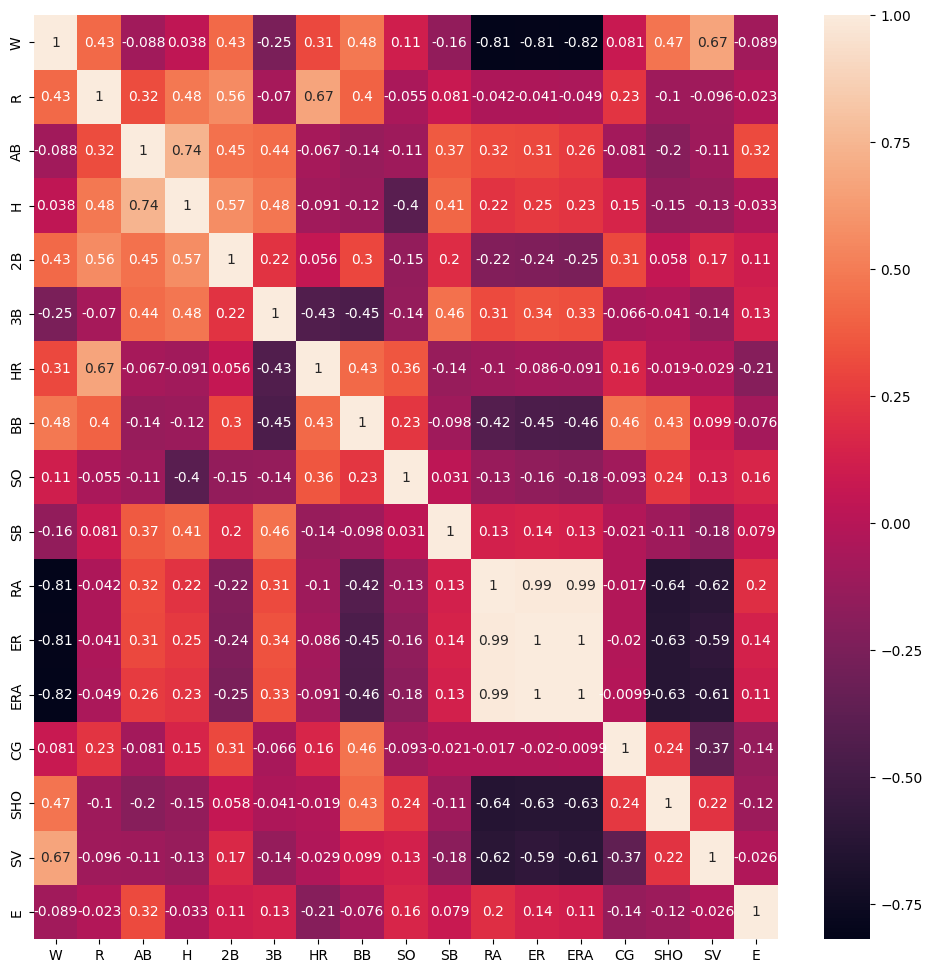

In [12]:
plt.figure(figsize = (12,12))
sns.heatmap(data.corr(), annot = True)

Almost all features seem to have a good relationship with the target, but there is some milticolinearity between features, between ERA,ER and RA. so we probably have to lose some features. ER and ERA seem to be very similar so we can drop one of them. These three also have correlation with SHO and SV.

In [114]:
data = data.sample(frac=1).reset_index(drop=True)

In [115]:
x = data.drop('W', axis=1)
y = data['W']

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
scaler = StandardScaler()

x_scaled = pd.DataFrame(scaler.fit_transform(x), columns= x.columns)

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled.values,i) for i in range(len(x_scaled.columns))]
vif['Features'] = x_scaled.columns

In [120]:
vif

,VIF,Features
0,11.522370,R
1,13.311532,AB
2,10.070668,H
3,4.019297,2B
4,3.294146,3B
5,10.079902,HR
6,3.806098,BB
7,2.652401,SO
8,2.102684,SB
9,191.839155,RA


In [121]:
x_scaled.drop(['ER'], axis=1, inplace=True)

In [122]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled.values,i) for i in range(len(x_scaled.columns))]
vif['Features'] = x_scaled.columns
vif

,VIF,Features
0,11.158733,R
1,5.863764,AB
2,9.628749,H
3,3.786446,2B
4,3.293109,3B
5,9.057309,HR
6,3.791451,BB
7,2.607389,SO
8,1.849280,SB
9,122.133235,RA


Since we didn't get good accuracy before, we will drop some other features that do not have a strong relationship as well

In [123]:
x_scaled.drop(['H','CG','E','AB','SB','SO'], axis=1, inplace=True)

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor as KNN

In [125]:
MaxAccu = 0
MaxRS = 0
for i in range(1,400):
  x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=i)
  LR = LinearRegression()
  LR.fit(x_train,y_train)
  pred = LR.predict(x_test)
  acc = r2_score(y_test,pred)
  if acc > MaxAccu:
    MaxAccu = acc
    MaxRS = i
print('MAximum Score:',MaxAccu,'\n', 'Best Random State:',MaxRS)

MAximum Score: 0.9629522621254225 
 Best Random State: 8


In [126]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.30,random_state=MaxRS)

**Linear Regression**


In [127]:
LR = LinearRegression()
LR.fit(x_train,y_train)
LRpred = LR.predict(x_test)
LR_trainpred = LR.predict(x_train)
print('R2_score:', r2_score(y_test,LRpred))
print('R2_score for training data:', r2_score(y_train,LR_trainpred))
print('MAE:', mean_absolute_error(y_test, LRpred))
print('MSE:', mean_squared_error(y_test, LRpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, LRpred)))

R2_score: 0.9629522621254225
R2_score for training data: 0.8641179664005001
MAE: 2.0775335767083174
MSE: 6.108760333985884
RMSE: 1.441365178123961


**Random Forest**

In [128]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
RFRpred = RFR.predict(x_test)
RFR_trainpred = LR.predict(x_train)
print('R2_score:', r2_score(y_test,RFRpred))
print('R2_score for training data:', r2_score(y_train,RFR_trainpred))
print('MAE:', mean_absolute_error(y_test, RFRpred))
print('MSE:', mean_squared_error(y_test, RFRpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, RFRpred)))

R2_score: 0.6447387466307277
R2_score for training data: 0.8641179664005001
MAE: 6.781111111111112
MSE: 58.57863333333335
RMSE: 2.6040566643433687


**KNN**

In [129]:
knn = KNN()
knn.fit(x_train,y_train)
knnpred = knn.predict(x_test)
knn_trainpred = knn.predict(x_train)
print('R2_score:', r2_score(y_test,knnpred))
print('R2_score for training data:', r2_score(y_train,knn_trainpred))
print('MAE:', mean_absolute_error(y_test, knnpred))
print('MSE:', mean_squared_error(y_test, knnpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, knnpred)))

R2_score: 0.6128032345013477
R2_score for training data: 0.5680791284403671
MAE: 7.133333333333334
MSE: 63.84444444444445
RMSE: 2.6708300832013507


**Gradient Boosting**

In [130]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
GBRpred = GBR.predict(x_test)
GBR_trainpred = GBR.predict(x_train)
print('R2_score:', r2_score(y_test,GBRpred))
print('R2_score for training data:', r2_score(y_train,GBR_trainpred))
print('MAE:', mean_absolute_error(y_test, GBRpred))
print('MSE:', mean_squared_error(y_test, GBRpred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, GBRpred)))

R2_score: 0.40513302665237394
R2_score for training data: 0.999999519598244
MAE: 8.580698636356466
MSE: 98.08695427198634
RMSE: 2.9292829560075733


**LASSO**

In [131]:
lasso = Lasso()
lasso.fit(x_train,y_train)
lassopred = lasso.predict(x_test)
lasso_trainpred = lasso.predict(x_train)
print('R2_score:', r2_score(y_test,lassopred))
print('R2_score for training data:', r2_score(y_train,lasso_trainpred))
print('MAE:', mean_absolute_error(y_test, lassopred))
print('MSE:', mean_squared_error(y_test, lassopred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, lassopred)))

R2_score: 0.8767973665873536
R2_score for training data: 0.8103711208485598
MAE: 4.070081448954838
MSE: 20.314745331596367
RMSE: 2.0174442864562177


**Ridge**

In [132]:
ridge = Ridge()
ridge.fit(x_train,y_train)
ridgepred = ridge.predict(x_test)
ridge_trainpred = ridge.predict(x_train)
print('R2_score:', r2_score(y_test,ridgepred))
print('R2_score for training data:', r2_score(y_train,ridge_trainpred))
print('MAE:', mean_absolute_error(y_test, ridgepred))
print('MSE:', mean_squared_error(y_test, ridgepred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, ridgepred)))

R2_score: 0.9475480303569646
R2_score for training data: 0.8588190845347075
MAE: 2.1969406108505893
MSE: 8.648746994473846
RMSE: 1.482208018751278


In [133]:
from sklearn.model_selection import cross_val_score

In [134]:
score = cross_val_score(LR, x_scaled, y)
print(score)
print(score.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,LRpred)-score.mean())

[ 0.95773595 -0.07842039  0.74061875  0.94344679  0.77261242]
0.6671987031757813
Difference Between score mean and R2score: 0.29575355894964117


In [135]:
score1 = cross_val_score(RFR, x_scaled, y)
print(score1)
print(score1.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,RFRpred)-score1.mean())

[ 0.66951275  0.53302688 -0.39465022  0.61840293  0.56771075]
0.39880061661918703
Difference Between score mean and R2score: 0.2459381300115407


In [136]:
score2 = cross_val_score(knn, x_scaled, y)
print(score2)
print(score2.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,knnpred)-score2.mean())

[0.48436261 0.12684211 0.47197309 0.68573104 0.39496418]
0.4327746049730772
Difference Between score mean and R2score: 0.18002862952827048


In [137]:
score3 = cross_val_score(GBR, x_scaled, y)
print(score3)
print(score3.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,GBRpred)-score3.mean())

[ 0.32921133 -0.66389597 -0.0784346   0.56916277  0.26089048]
0.08338680256163147
Difference Between score mean and R2score: 0.3217462240907425


In [138]:
score4 = cross_val_score(lasso, x_scaled, y)
print(score4)
print(score4.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,lassopred)-score4.mean())

[0.89892187 0.56077486 0.76877154 0.81904595 0.77739117]
0.764981078433879
Difference Between score mean and R2score: 0.11181628815347466


In [139]:
score5 = cross_val_score(ridge, x_scaled, y)
print(score5)
print(score5.mean())
print('Difference Between score mean and R2score:', r2_score(y_test,ridgepred)-score5.mean())

[0.95702565 0.5644508  0.75290352 0.93388203 0.7787285 ]
0.7973981022351297
Difference Between score mean and R2score: 0.1501499281218348


Text(0.5, 1.0, 'Gradient Boosting')

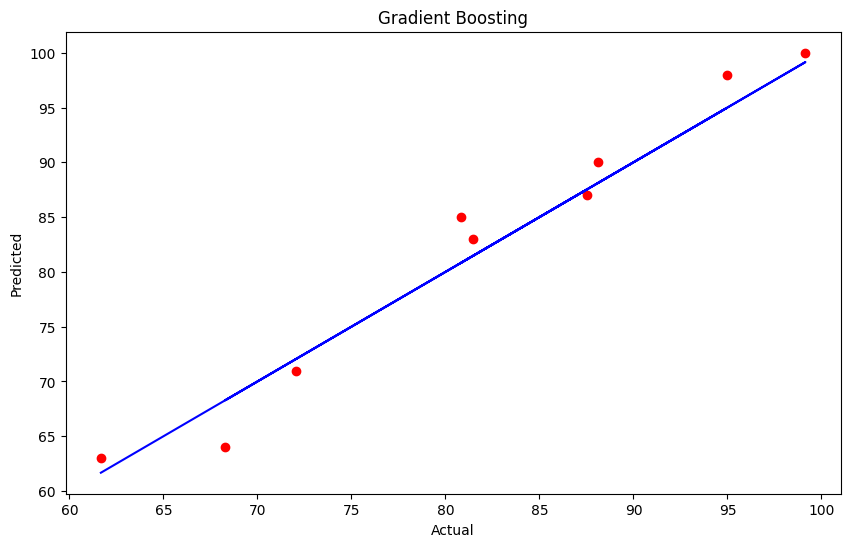

In [140]:
plt.figure(figsize=(10,6))
plt.scatter(x=LRpred,y=y_test,color='r')
plt.plot(LRpred,LRpred, color='b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting')

Text(0.5, 1.0, 'Gradient Boosting')

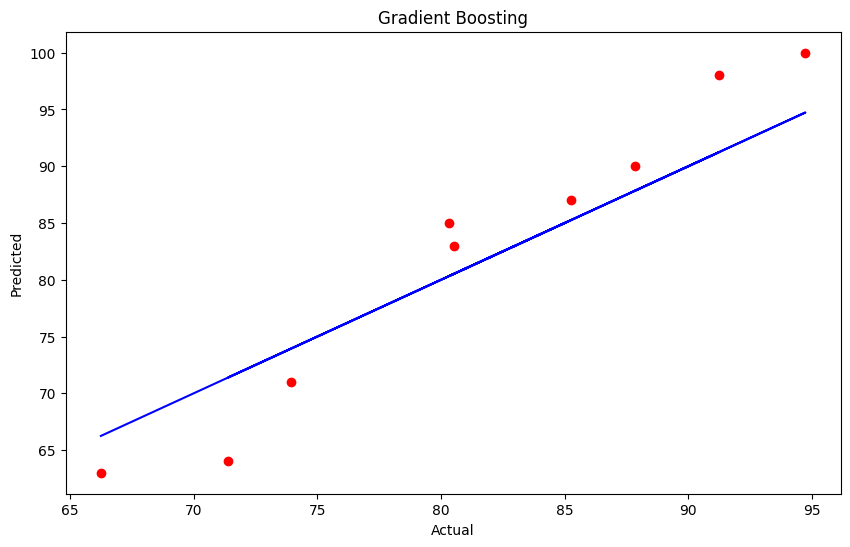

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(x=lassopred,y=y_test,color='r')
plt.plot(lassopred,lassopred, color='b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting')

Text(0.5, 1.0, 'Gradient Boosting')

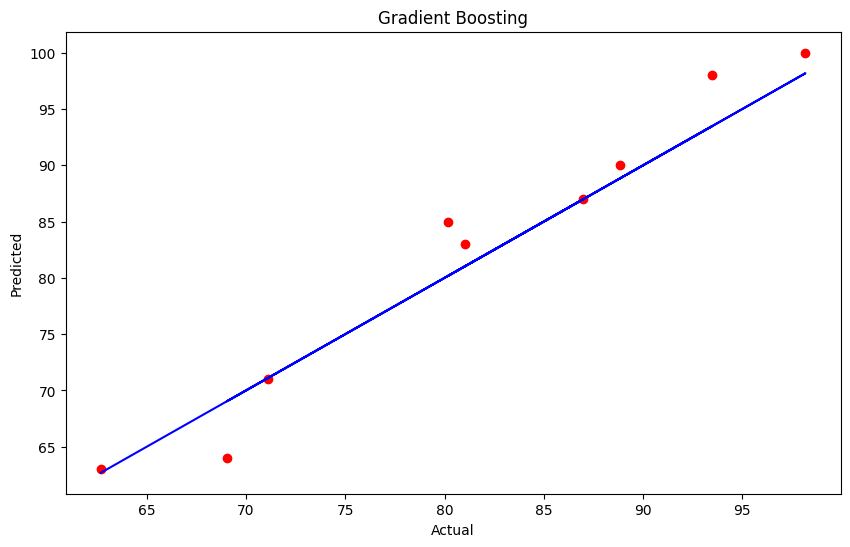

In [142]:
plt.figure(figsize=(10,6))
plt.scatter(x=ridgepred,y=y_test,color='r')
plt.plot(ridgepred,ridgepred, color='b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting')

Probably because the size of the data is not large, we are not getting a great accuracy, but Linear Regression seem to be the best model

In [144]:
from sklearn.model_selection import GridSearchCV

**Hyperparameter Tuning**

In [146]:
param = {'fit_intercept': [True, False], 'positive':[False,True], 'copy_X': [True,False]}
gscv = GridSearchCV(LinearRegression(),param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [False, True]})

In [147]:
gscv.best_params_

{'copy_X': True, 'fit_intercept': True, 'positive': False}

In [148]:
model = LinearRegression(copy_X= True, fit_intercept= True, positive= False)

In [149]:
model.fit(x_train,y_train)
pred = model.predict(x_test)
print('R2_score:', r2_score(y_test,pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_absolute_error(y_test, pred)))

R2_score: 0.9629522621254225
MAE: 2.0775335767083174
MSE: 6.108760333985884
RMSE: 1.441365178123961


In [150]:
import joblib

In [151]:
joblib.dump(model,'baseball_model.pk1')

['baseball_model.pk1']

In [152]:
df = pd.DataFrame()
actual = np.array(y_test)
df['Actual'] = actual
df['Prediction'] = pred

In [153]:
df

,Actual,Prediction
0,90,88.126974
1,100,99.146199
2,85,80.802362
3,98,94.955926
4,71,72.031290
5,64,68.286512
6,87,87.550905
7,83,81.463753
8,63,61.675691
